## Download the dataset

For this lab, you will use the `subwords8k` pre-tokenized [IMDB Reviews dataset](https://www.tensorflow.org/datasets/catalog/imdb_reviews). You will load it via Tensorflow Datasets as you've done last week:

In [28]:
import tensorflow_datasets as tfds

# Download the subword encoded pretokenized dataset
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)

# Get the tokenizer
tokenizer = info.features['text'].encoder

In [29]:
dir(info.features['text'])

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_additional_repr_info',
 '_dtype',
 '_encoder',
 '_encoder_cls',
 '_encoder_config',
 '_flatten',
 '_nest',
 '_registered_features',
 '_shape',
 'decode_batch_example',
 'decode_example',
 'decode_ragged_example',
 'dtype',
 'encode_example',
 'encoder',
 'from_config',
 'from_json',
 'from_json_content',
 'get_serialized_info',
 'get_tensor_info',
 'ints2str',
 'load_metadata',
 'maybe_build_from_corpus',
 'maybe_set_encoder',
 'repr_html',
 'repr_html_batch',
 'repr_html_ragged',
 'save_config',
 'save_metadata',
 'shape',
 'str2ints',
 'to_json',
 'to_json_cont

In [30]:
info.features.keys()

dict_keys(['text', 'label'])

In [31]:
BUFFER_SIZE = 10000
BATCH_SIZE = 256

# Get the train and test splits
train_data, test_data = dataset['train'], dataset['test'], 

# Shuffle the training data
train_dataset = train_data.shuffle(BUFFER_SIZE)

# Batch and pad the datasets to the maximum length of the sequences
train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_data.padded_batch(BATCH_SIZE)

In [32]:
# Why each bach is padded differently
for example in train_dataset.take(1):
  print(example[0])

tf.Tensor(
[[1162  622    2 ...    0    0    0]
 [4344    2   82 ...    0    0    0]
 [3694 7606 8032 ...    0    0    0]
 ...
 [  12 4591 7961 ...    0    0    0]
 [7915 7961  989 ...    0    0    0]
 [3035  105    5 ...    0    0    0]], shape=(256, 1451), dtype=int64)


In [33]:
tokenizer_subwords =  info.features['text'].encoder

for example in dataset['train'].take(2):
  print(tokenizer_subwords.decode(example[0]))

for example in dataset['train'].take(2):
  print(example[1])

This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.
I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was cons

In [34]:
# <br /> is line break
for example in train_dataset.take(1):
  print(tokenizer_subwords.decode(example[0][0,:]))

This film is about a group of extra terrestrial gay black men exterminating females on Earth, in order to create a gay Universe.<br /><br />I watched it with the intent of seeing how bad it was. Still, I was shocked at how bad it was. It looked more like a film made 50 years ago. The acting, if any, is ultra bad. The sets and props are so ridiculously fake, making any college film look mega budget. And the special effects are laughably simple, indeed jaw dropping as others have commented, but jaw droppingly embarrassing.<br /><br />One has to be severely intoxicated, or in an altered state of consciousness in order to appreciate this film. If I was from Denmark, I would be severely embarrassed and humiliated that my countrymen produced such a horrifyingly bad film.


## Build and compile the model

[Biderectional](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Bidirectional)
passing of the sequence information goes both forwards and backwards.

In [35]:
import tensorflow as tf

# Hyperparameters
embedding_dim = 64
lstm_dim = 64
dense_dim = 64

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 64)          523840    
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              66048     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Set the training parameters
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
NUM_EPOCHS = 10

history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
98/98 [==============================] - 30s 265ms/step - loss: 0.5574 - accuracy: 0.6916 - val_loss: 0.4155 - val_accuracy: 0.8151
Epoch 2/10
98/98 [==============================] - 26s 264ms/step - loss: 0.3380 - accuracy: 0.8647 - val_loss: 0.4335 - val_accuracy: 0.8094
Epoch 3/10
98/98 [==============================] - 26s 254ms/step - loss: 0.2664 - accuracy: 0.9005 - val_loss: 0.4166 - val_accuracy: 0.8191
Epoch 4/10
98/98 [==============================] - 26s 255ms/step - loss: 0.2298 - accuracy: 0.9156 - val_loss: 0.4130 - val_accuracy: 0.8302
Epoch 5/10
98/98 [==============================] - 26s 265ms/step - loss: 0.1970 - accuracy: 0.9308 - val_loss: 0.4199 - val_accuracy: 0.8421
Epoch 6/10
98/98 [==============================] - 26s 257ms/step - loss: 0.1890 - accuracy: 0.9311 - val_loss: 0.4407 - val_accuracy: 0.8317
Epoch 7/10
98/98 [==============================] - 26s 257ms/step - loss: 0.1423 - accuracy: 0.9515 - val_loss: 0.4638 - val_accuracy: 0.8362

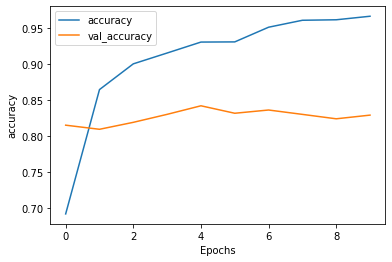

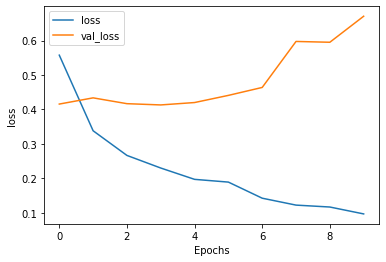

In [38]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and results 
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

# Two LSTM

In [39]:
# Hyperparameters
embedding_dim = 64
lstm1_dim = 64
lstm2_dim = 32
dense_dim = 64

# Build the model
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm1_dim, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm2_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Print the model summary
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 64)          523840    
                                                                 
 bidirectional_4 (Bidirectio  (None, None, 128)        66048     
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 635,329
Trainable params: 635,329
Non-tr

In [40]:
# Set the training parameters
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
NUM_EPOCHS = 10

# Train the model
history = model2.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
98/98 [==============================] - 51s 471ms/step - loss: 0.5643 - accuracy: 0.6898 - val_loss: 0.4210 - val_accuracy: 0.8167
Epoch 2/10
98/98 [==============================] - 45s 457ms/step - loss: 0.3128 - accuracy: 0.8769 - val_loss: 0.3543 - val_accuracy: 0.8608
Epoch 3/10
98/98 [==============================] - 46s 469ms/step - loss: 0.2312 - accuracy: 0.9157 - val_loss: 0.4037 - val_accuracy: 0.8193
Epoch 4/10
98/98 [==============================] - 45s 454ms/step - loss: 0.1887 - accuracy: 0.9328 - val_loss: 0.4612 - val_accuracy: 0.8134
Epoch 5/10
98/98 [==============================] - 46s 461ms/step - loss: 0.1446 - accuracy: 0.9512 - val_loss: 0.5184 - val_accuracy: 0.8310
Epoch 6/10
98/98 [==============================] - 45s 458ms/step - loss: 0.1164 - accuracy: 0.9604 - val_loss: 0.5348 - val_accuracy: 0.8372
Epoch 7/10
98/98 [==============================] - 45s 454ms/step - loss: 0.1301 - accuracy: 0.9536 - val_loss: 0.5597 - val_accuracy: 0.8127

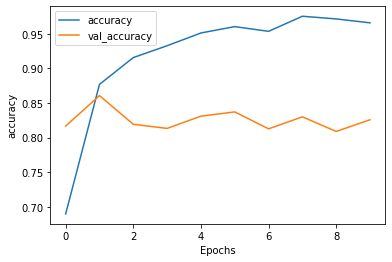

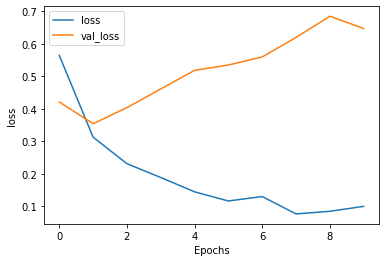

In [42]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and results 
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [43]:
!hostname

583fd26ef23c


In [44]:
!nvidia-smi

Sun Jul 10 19:29:59 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   78C    P0    46W /  70W |  14486MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------